# K-armed Bandits Problem

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
maximum = 20

In [3]:
class k_armed_bandit:
    def __init__(self, k):
        self.k = k
        self.p = [(random.uniform(0, maximum), 1) for i in range(k)]
    
    def show_dist(self):
        print(self.p)
    
    def play(self, idx):
        return random.gauss(*self.p[idx])

In [4]:
k = 10
m = k_armed_bandit(k)
m.play(0)

8.127273704444498

## Action-value Methods

$$
\begin{aligned}
Q(A) &= \frac{\text{sum of rewards when a take prior to t}}{\text{number of times a take prior to t}} \\
&= \frac{\sum_{i = 1}^{t-1} R_i \cdot 1_{A_i = a}} {\sum^{t-1}_{i=1} 1_{A_i = a}}
\end{aligned}
$$

## update rules

$$
Q_{n+1}(A) = Q_n + \frac{1}{n}[R_n - Q_n]
$$

## A simple bandit algorithm

Initialize, for $a  = 1$ to k:

$$Q(a) \leftarrow 0$$

$$N(a) \leftarrow 0$$

Loop forever:


$$A \leftarrow \begin{cases}
\mathop{argmax}_a Q(a) & \text{wih probabaility 1 - $\varepsilon$ (breaking ties randomly) }\\
\text{a random action} & \text{with probability $\varepsilon$}
\end{cases}$$

$$R \leftarrow bandit(A)$$

$$N(A) \leftarrow N(A) + 1$$

$$Q(A) \leftarrow Q(A) + \frac{1}{N} [R - Q(A)]$$

In [5]:
m.show_dist()

[(6.738346193955764, 1), (3.285690235943275, 1), (0.25255974177340823, 1), (2.1168819147561613, 1), (16.40967869011819, 1), (13.672862156801614, 1), (3.975706096516811, 1), (18.66727533495254, 1), (8.707890945950714, 1), (18.55348568496272, 1)]


# random selection and estimation

In [6]:
def random_estimation(epochs):
    n_list = [0] * k
    q_list = [0] * k
    reward_list = []
    for i in range(epochs):
        t = i + 1
        idx = random.randint(0, k - 1)
        reward = m.play(idx)
        n_list[idx] += 1
        reward_list.append(reward)
        q_list[idx] = q_list[idx] + (reward - q_list[idx]) / n_list[idx]
    return q_list, reward_list

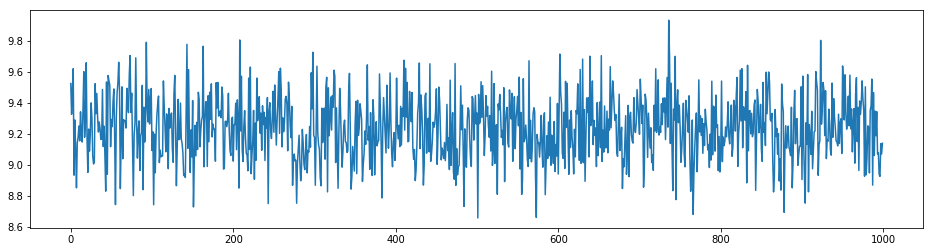

In [7]:
epochs, num_experiments = 1000, 1000
r = np.array([random_estimation(epochs)[1] for i in range(num_experiments)])
plt.figure(figsize=(16, 4))
plt.plot(np.arange(r.shape[1]), r.mean(axis=0))

# greedy estimation

In [8]:
def greedy_estimation(epochs, optimistic=False):
    if optimistic:
        q_list = [maximum + 1] * k
    else:
        q_list = [0] * k
    n_list = [0] * k
    reward_list = []
    for e in range(epochs):
        t = e + 1
        max_value = max(q_list)
        idx = random.choice([idx for idx, x in enumerate(q_list) if x == max_value])
        reward = m.play(idx)
        n_list[idx] += 1
        reward_list.append(reward)
        q_list[idx] = q_list[idx] + (reward - q_list[idx]) / n_list[idx]
    return q_list, reward_list

In [9]:
q, r = greedy_estimation(1000)
q

[0, 0, -0.21948254341072249, 0, 0, 0, 0, 18.635211164556473, 0, 0]

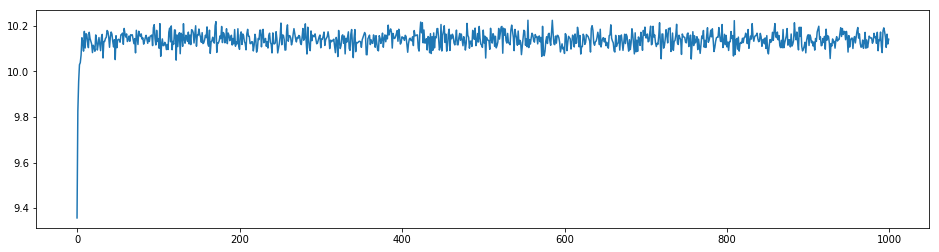

In [10]:
epochs, num_experiments = 1000, 1000
r = np.array([greedy_estimation(epochs)[1] for i in range(num_experiments)])
plt.figure(figsize=(16, 4))
plt.plot(np.arange(r.shape[1]), r.mean(axis=0))

# epsilon-greedy estimation

In [11]:
def epsilon_greedy_estimation(epochs, epsilon, optimistic=False):
    if optimistic:
        q_list = [maximum + 1] * k
    else:
        q_list = [0] * k
    n_list = [0] * k
    reward_list = []
    for e in range(epochs):
        t = e + 1
        if random.uniform(0, 1) > epsilon:
            max_value = max(q_list)
            idx = random.choice([idx for idx, x in enumerate(q_list) if x == max_value])
        else:
            idx = random.randint(0, k - 1)
        reward = m.play(idx)
        n_list[idx] += 1
        reward_list.append(reward)
        q_list[idx] = q_list[idx] + (reward - q_list[idx]) / n_list[idx]
    return q_list, reward_list

In [12]:
q, r = epsilon_greedy_estimation(1000, 0.1)
q

[7.050104632254265,
 3.3452592600393487,
 0.8024440349376509,
 2.054130112484773,
 16.937929682148724,
 14.039000393804368,
 3.9384240115826668,
 18.713362183806286,
 8.547020460361678,
 18.116378976233605]

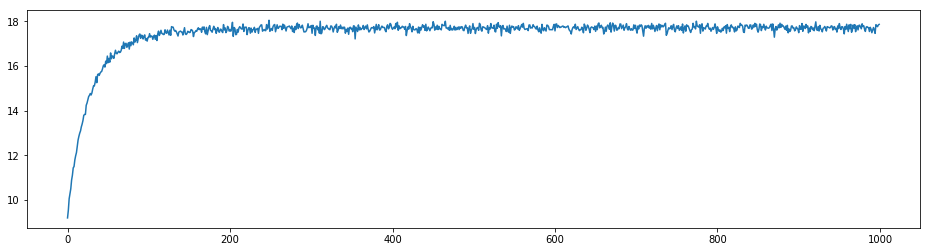

In [13]:
epochs, num_experiments = 1000, 1000
r = np.array([epsilon_greedy_estimation(epochs, 0.1)[1] for i in range(num_experiments)])
plt.figure(figsize=(16, 4))
plt.plot(np.arange(r.shape[1]), r.mean(axis=0))

# comparsion

In [14]:
epochs, num_experiments = 200, 4000
x_list = np.arange(epochs)

In [15]:
# r_random = np.array([random_estimation(epochs)[1] for i in range(num_experiments)]).mean(axis=0)
r_greedy = np.array([greedy_estimation(epochs)[1] for i in range(num_experiments)]).mean(axis=0)
r_e_greedy = np.array([epsilon_greedy_estimation(epochs, 0.1)[1] for i in range(num_experiments)]).mean(axis=0)
r_e_greedy2 = np.array([epsilon_greedy_estimation(epochs, 0.01)[1] for i in range(num_experiments)]).mean(axis=0)
r_e_greedy3 = np.array([epsilon_greedy_estimation(epochs, 0.5)[1] for i in range(num_experiments)]).mean(axis=0)

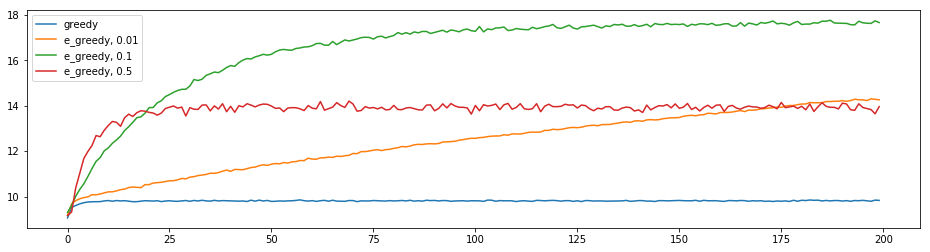

In [16]:
plt.figure(figsize=(16, 4))
# plt.plot(x_list, r_random, label='random')
plt.plot(x_list, r_greedy, label='greedy')
plt.plot(x_list, r_e_greedy2, label='e_greedy, 0.01')
plt.plot(x_list, r_e_greedy, label='e_greedy, 0.1')
plt.plot(x_list, r_e_greedy3, label='e_greedy, 0.5')
plt.legend()

In [17]:
r_greedy_op = np.array([greedy_estimation(epochs, True)[1] for i in range(num_experiments)]).mean(axis=0)
r_e_greedy_op = np.array([epsilon_greedy_estimation(epochs, 0.1, True)[1] for i in range(num_experiments)]).mean(axis=0)
r_e_greedy2_op = np.array([epsilon_greedy_estimation(epochs, 0.01, True)[1] for i in range(num_experiments)]).mean(axis=0)
r_e_greedy3_op = np.array([epsilon_greedy_estimation(epochs, 0.5, True)[1] for i in range(num_experiments)]).mean(axis=0)

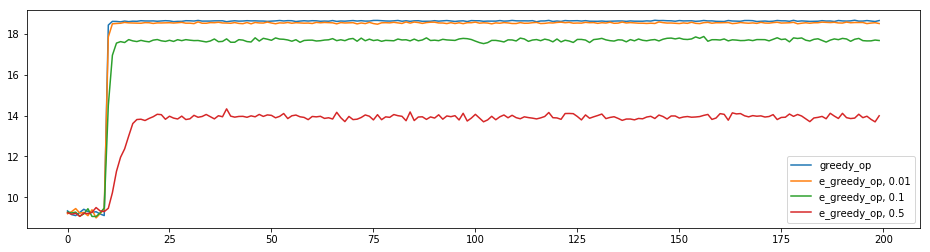

In [18]:
plt.figure(figsize=(16, 4))
# plt.plot(x_list, r_random, label='random')
plt.plot(x_list, r_greedy_op, label='greedy_op')
plt.plot(x_list, r_e_greedy2_op, label='e_greedy_op, 0.01')
plt.plot(x_list, r_e_greedy_op, label='e_greedy_op, 0.1')
plt.plot(x_list, r_e_greedy3_op, label='e_greedy_op, 0.5')
plt.legend()

# Upper-confidence-Bound Action Selection

$$
A_t = \mathop{argmax}\limits_a [Q_t(a) + c \sqrt{\frac{\ln t}{N_t(a)}}]
$$

In [19]:
def ucb_estimation(epochs, c=2):
    q_list = [0] * k
    n_list = [0] * k
    reward_list = []
    for e in range(epochs):
        t = e + 1
        tmp = []
        for i in range(k):
            tmp.append(q_list[i] + c * np.sqrt(math.log(t) / n_list[i]) if n_list[i] != 0 else 1e9)
        idx = np.argmax(tmp)
        reward = m.play(idx)
        n_list[idx] += 1
        reward_list.append(reward)
        q_list[idx] = q_list[idx] + (reward - q_list[idx]) / n_list[idx]
    return q_list, reward_list

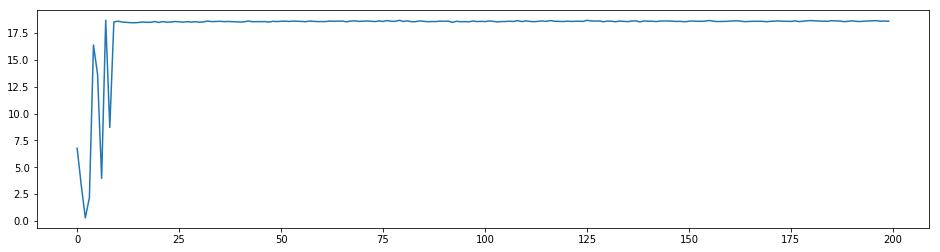

In [20]:
epochs, num_experiments = 200, 1000
r = np.array([ucb_estimation(epochs, 2)[1] for i in range(num_experiments)])
plt.figure(figsize=(16, 4))
plt.plot(np.arange(r.shape[1]), r.mean(axis=0))

In [21]:
# r_random = np.array([random_estimation(epochs)[1] for i in range(num_experiments)]).mean(axis=0)
r_greedy = np.array([greedy_estimation(epochs)[1] for i in range(num_experiments)]).mean(axis=0)
r_e_greedy = np.array([epsilon_greedy_estimation(epochs, 0.1)[1] for i in range(num_experiments)]).mean(axis=0)
r_e_greedy2 = np.array([epsilon_greedy_estimation(epochs, 0.01)[1] for i in range(num_experiments)]).mean(axis=0)
r_e_greedy3 = np.array([epsilon_greedy_estimation(epochs, 0.5)[1] for i in range(num_experiments)]).mean(axis=0)
ucb = np.array([ucb_estimation(epochs, 2)[1] for i in range(num_experiments)]).mean(axis=0)

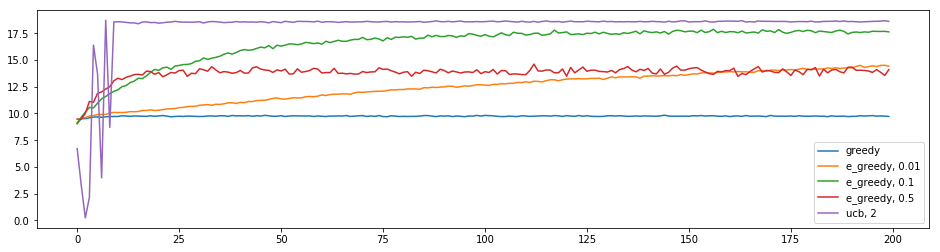

In [22]:
plt.figure(figsize=(16, 4))
plt.plot(x_list, r_greedy, label='greedy')
plt.plot(x_list, r_e_greedy2, label='e_greedy, 0.01')
plt.plot(x_list, r_e_greedy, label='e_greedy, 0.1')
plt.plot(x_list, r_e_greedy3, label='e_greedy, 0.5')
plt.plot(x_list, ucb, label='ucb, 2')
plt.legend()